<a href="https://colab.research.google.com/github/deepakgopan/data_science_practice/blob/main/INDIA%20per%20capita%20income%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing
import numpy as np

In [63]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/API_NY.ADJ.NNTY.PC.CD_DS2_en_csv_v2_4683603.csv")

In [64]:
df.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,Adjusted net national income per capita (curre...,NY.ADJ.NNTY.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,22106.983018,23123.013898,24173.603629,24120.101723,24584.121098,25021.539233,NaN,NaN,NaN,NaN


In [65]:
# Fetching INDIA's PER CAPITA INCOME
df=df.fillna(0)
df.iloc[109]
dfind=df.iloc[109].to_frame()
dfind=dfind.iloc[4:-1]
dfind.reset_index(inplace=True)
dfind.rename({'index': 'Year', 109: 'Income'}, axis=1,inplace = True,errors="raise")
dfind=dfind.iloc[10:-1]
dfind.head()

,Year,Income
10,1970,104.07075
11,1971,109.660455
12,1972,113.677128
13,1973,132.891752
14,1974,150.144175


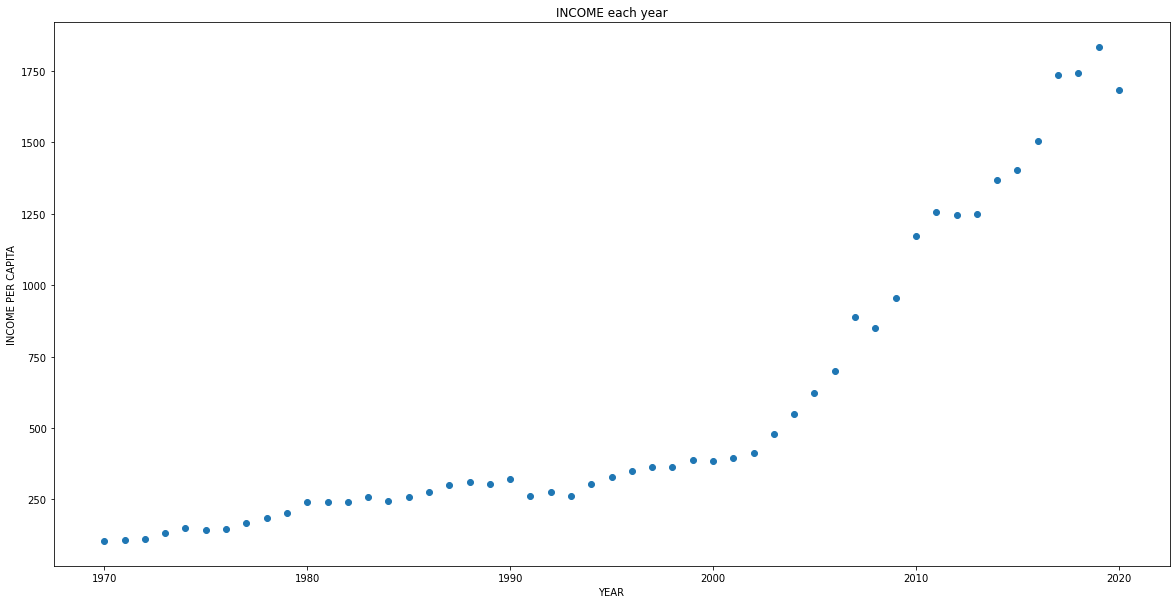

In [100]:
plt.figure(figsize=(20,10))
plt.xlabel("YEAR")
plt.ylabel("INCOME PER CAPITA")
plt.title("INCOME each year")
plt.scatter(dfind["Year"],dfind["Income"])


In [67]:
dfind = dfind.astype({"Year": int})
dfind = dfind.astype({"Income": int})

#**The Linear regression model**


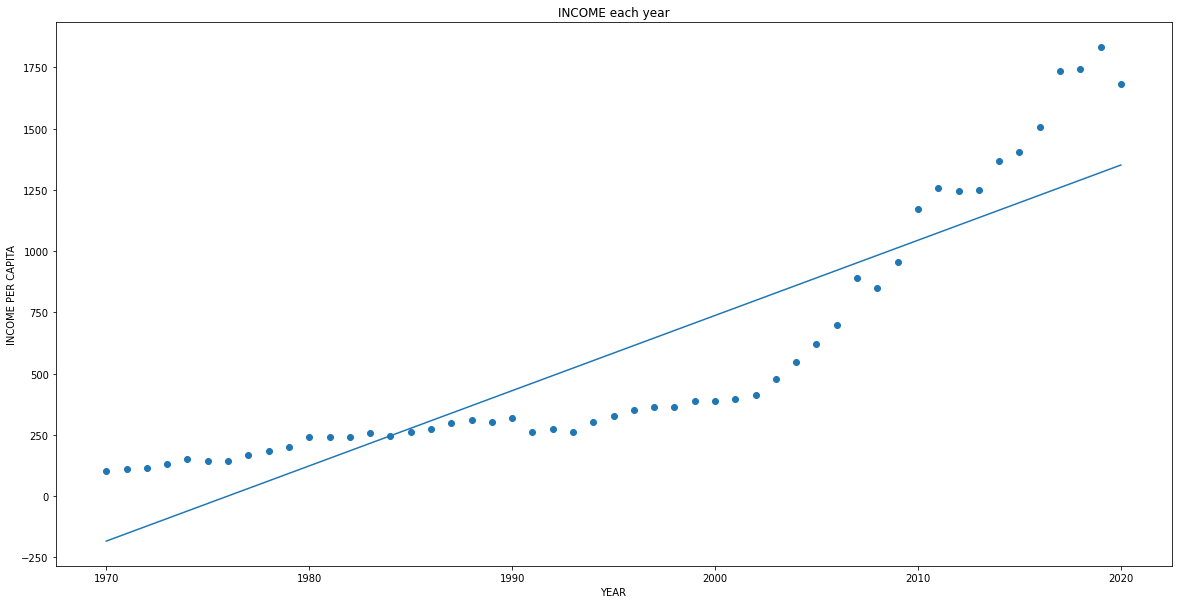

In [102]:
reg=linear_model.LinearRegression()
reg.fit(dfind[["Year"]], dfind.Income)
y=reg.predict(dfind[["Year"]])
plt.figure(figsize=(20,10))
plt.xlabel("YEAR")
plt.ylabel("INCOME PER CAPITA")
plt.title("INCOME each year")
plt.scatter(dfind["Year"],dfind["Income"])
plt.plot(dfind[["Year"]],y)

#**Predict using Linear regression**

In [106]:
reg.predict([[2021]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1382.29568627])

#**Non linear regression model with degree 2**

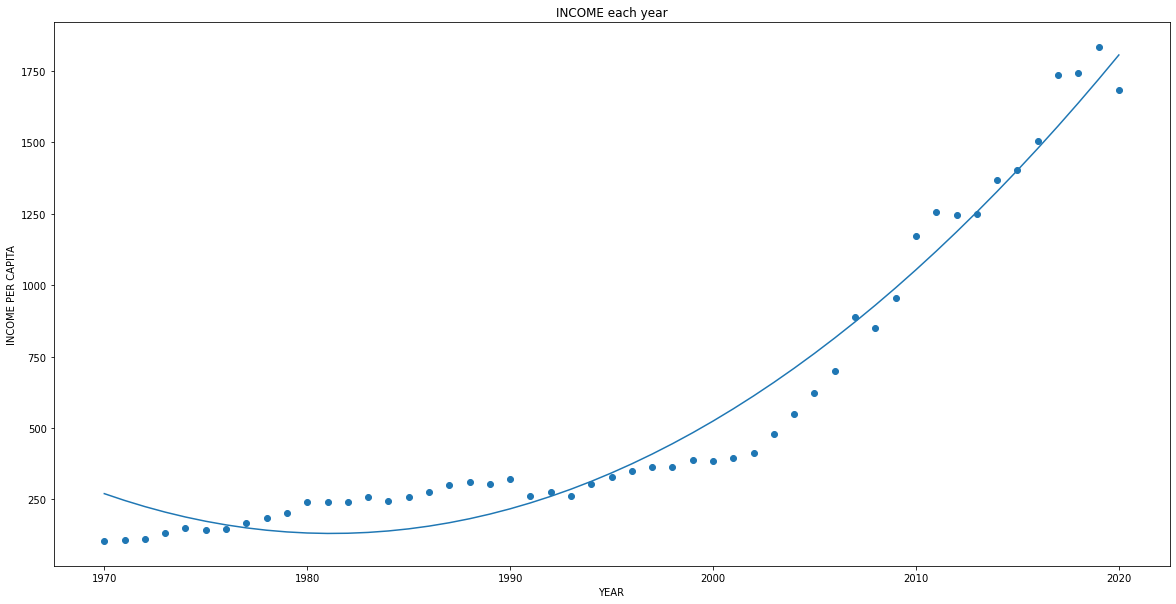

In [113]:
poly=preprocessing.PolynomialFeatures(degree=2)
poly_feat=poly.fit_transform(dfind[["Year"]])
poly_reg_model = linear_model.LinearRegression()
poly_reg_model.fit(poly_feat,dfind.Income)
y=poly_reg_model.predict(poly_feat)
plt.figure(figsize=(20,10))
plt.xlabel("YEAR")
plt.ylabel("INCOME PER CAPITA")
plt.title("INCOME each year")
plt.scatter(dfind["Year"],dfind["Income"])
plt.plot(dfind[["Year"]],y)

#**Prediction using non linear regression model with degree = 2**

In [112]:
x=poly.fit_transform([[2021]])
poly_reg_model.predict(x)

array([1893.21157271])